In [1]:
import numpy as np
import pandas as pd

import clean_df as clean
import pickle

In [2]:
from sklearn.datasets import load_diabetes
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [253]:
import scipy as sp
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier


from sklearn.metrics import classification_report
from sklearn.model_selection import learning_curve, GridSearchCV

In [309]:
## reading training dara

raw_df = pd.read_csv("N:/Zhao/12_Prefer/Prefer_Data/training_data/PreFer_train_data.csv")
df_b = pd.read_csv("N:/Zhao/12_Prefer/Prefer_Data/other_data/PreFer_train_background_data.csv")

training_var=clean.clean_df(raw_df,df_b)
training_outcome=pd.read_csv("N:/Zhao/12_Prefer/Prefer_Data/training_data/PreFer_train_outcome.csv")


C:\Users\Zhao\AppData\Local\Temp\3\ipykernel_35796\1299088917.py:1: DtypeWarning: Columns (2583,2584,2585,2586,2587,2588,2589,4358,4359,4360,4361,4362,4363,4364,4365,4366,4367,4368,4369,4370,4371,4372,4373,4374,4375,4379,4380,4381,4382,4383,4384,4385,4386,4387,4388,4389,4390,4391,4392,4393,4394,4395,4396,4397,4398,4399,4400,4401,4405,4406,4407,4408,4409,5215,5216,5219,5220,5613,5614,5615,5616,5617,5618,5619,5620,5621,5622,5624,5625,5626,5627,5628,5629,5630,5631,5632,5633,5634,5635,5636,5638,5639,5640,5787,5788,5789,5790,5791,5792,5793,5794,5795,5796,6393,6394,6395,6396,6397,6398,6399,6400,6401,6402,6403,6619,6620,6621,6622,6623,6624,6625,6626,6627,6628,6629,6630,6631,6632,6633,6634,6635,6638,6640,6641,6642,6643,6644,6645,6646,6647,6648,6649,6650,6651,6652,6653,6654,6655,6656,6657,6658,6659,6660,6661,6664,6666,6667,6668,6669,6670,6965,6966,6967,6968,6969,6970,6971,6972,6973,6974,6975,7064,7065,7066,7067,7068,7069,7070,7071,7072,7073,7074,7163,7164,7165,7166,7167,7168,7169,7170,7171,7172

In [319]:
## reading test dara

test_df = pd.read_csv("N:/Zhao/12_Prefer/Prefer_Data/other_data/PreFer_fake_data.csv")
test_b = pd.read_csv("N:/Zhao/12_Prefer/Prefer_Data/other_data/PreFer_fake_background_data.csv")

test_var=clean.clean_df(test_df,test_b)
test_outcome=pd.read_csv("N:/Zhao/12_Prefer/Prefer_Data/other_data/PreFer_fake_outcome.csv")

In [311]:
training_var["parity"]=training_var.apply(lambda row: 0 if ((row["partnership_status"]==2)|(row["partnership_status"]==1))&(row["parity"]==np.nan) else row["parity"], axis=1)



In [312]:
# imupute missing value with median value

imputed_media=training_var[['gender_bg', 'age_bg',
       'partnership_status', 'domestic_situation', 'lenght_partnership',
       'age_of_partner', 'satisf_partnership', 'gender_of_partner',
       'age_of_female', 'age_of_male', 'hh_net_income', 'fertility_intentions',
       'parity', 'high_edu_level', 'child_soon', 'n_children_in_hh']].median()

In [313]:
var=['gender_bg', 'age_bg',
       'partnership_status', 'domestic_situation', 'lenght_partnership',
       'age_of_partner', 'satisf_partnership', 'gender_of_partner',
       'age_of_female', 'age_of_male', 'hh_net_income', 'fertility_intentions',
       'parity', 'high_edu_level', 'child_soon', 'n_children_in_hh']

training_var=training_var[training_var["outcome_available"]==1]
training_var[var]=training_var[var].fillna(imputed_media)
training_outcome=training_outcome[training_outcome["nomem_encr"].isin(training_var["nomem_encr"])]

C:\Users\Zhao\AppData\Local\Temp\3\ipykernel_35796\2175334512.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_var[var]=training_var[var].fillna(imputed_media)


In [316]:
var_cate=["gender_bg","partnership_status","domestic_situation","satisf_partnership","fertility_intentions","high_edu_level"]

## I decieded to drop these variables and I don't think the median value make sense for imputation of the follwoing variables
X_train= training_var.drop(columns=["outcome_available","age_of_partner","gender_of_partner","age_of_female","age_of_male"])
X_train=X_train.dropna(how='any')
y_train=training_outcome[training_outcome["nomem_encr"].isin(X_train["nomem_encr"])][["nomem_encr","new_child"]]
X_train[var_cate] =X_train[var_cate].astype('int').astype("category")
y_train["new_child"] = y_train["new_child"].astype('int')


df_train=X_train.merge(y_train,on="nomem_encr",how="left")
X_train=X_train.drop(columns="nomem_encr")
y_train=y_train.drop(columns="nomem_encr")

In [166]:
X_train.dtypes

gender_bg               category
age_bg                   float64
partnership_status      category
domestic_situation      category
hh_net_income            float64
fertility_intentions    category
high_edu_level          category
n_children_in_hh         float64
dtype: object

In [320]:
X_test=test_var.drop(columns=["outcome_available","age_of_partner","gender_of_partner","age_of_female","age_of_male"])
X_test=X_test.dropna(how='any')
y_test=test_outcome[test_outcome["nomem_encr"].isin(X_test["nomem_encr"])][["nomem_encr","new_child"]]
X_test[var_cate] =X_test[var_cate].astype('int').astype("category")
y_test["new_child"]=y_test["new_child"].astype('int')

df_test=X_test.merge(y_test,on="nomem_encr",how="left")
X_test=X_test.drop(columns="nomem_encr")
y_test=y_test.drop(columns="nomem_encr")

In [329]:
## interaction between gender and age

X_train["gender_age_inter"]=(X_train["gender_bg"].astype(int)-1)*X_train['age_bg']
X_test["gender_age_inter"]=(X_test["gender_bg"].astype(int)-1)*X_test['age_bg']

C:\Users\Zhao\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of the GBM on test set: 0.750
              precision    recall  f1-score   support

           0       0.83      0.86      0.84        22
           1       0.40      0.33      0.36         6

    accuracy                           0.75        28
   macro avg       0.61      0.60      0.60        28
weighted avg       0.73      0.75      0.74        28



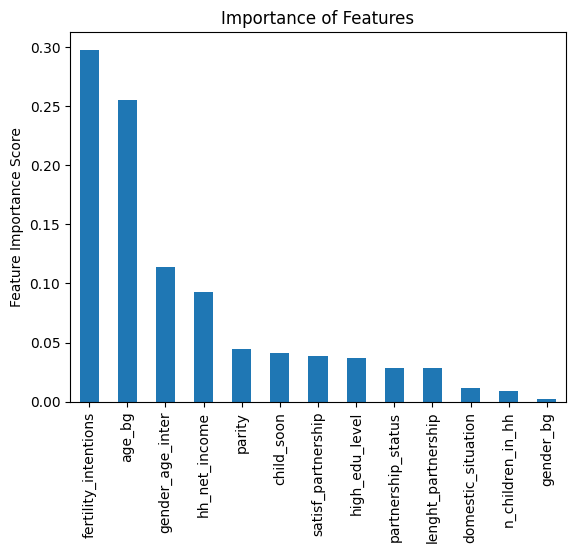

In [330]:

## baseline variables

baseline = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100,max_depth=3, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10)
baseline.fit(X_train,y_train)
predictors=list(X_train)
feat_imp = pd.Series(baseline.feature_importances_, predictors).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')
print('Accuracy of the GBM on test set: {:.3f}'.format(baseline.score(X_test, y_test)))
pred=baseline.predict(X_test)
print(classification_report(y_test, pred))

In [ ]:
## truning process

In [331]:
p_test3 = {'learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001], 'n_estimators':range(100,2000,50)}

tuning = GridSearchCV(estimator =GradientBoostingClassifier(max_depth=4, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10), 
            param_grid = p_test3, scoring='accuracy',n_jobs=4, cv=5)
tuning.fit(X_train,y_train)
tuning.best_score_,tuning.best_params_,tuning.best_estimator_

C:\Users\Zhao\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(0.86931241347485,
 {'learning_rate': 0.05, 'n_estimators': 200},
 GradientBoostingClassifier(learning_rate=0.05, max_depth=4, max_features='sqrt',
                            n_estimators=200, random_state=10, subsample=1))

In [332]:
p_test2 = {'max_depth':[2,3,4,5,6,7,8,9,10] }
tuning = GridSearchCV(estimator =GradientBoostingClassifier(learning_rate=0.05,n_estimators=200, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10), 
            param_grid = p_test2, scoring='accuracy',n_jobs=4, cv=5)
tuning.fit(X_train,y_train)
tuning.best_score_,tuning.best_params_,tuning.best_estimator_

C:\Users\Zhao\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(0.86931241347485,
 {'max_depth': 4},
 GradientBoostingClassifier(learning_rate=0.05, max_depth=4, max_features='sqrt',
                            n_estimators=200, random_state=10, subsample=1))

C:\Users\Zhao\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of the GBM on test set: 0.714


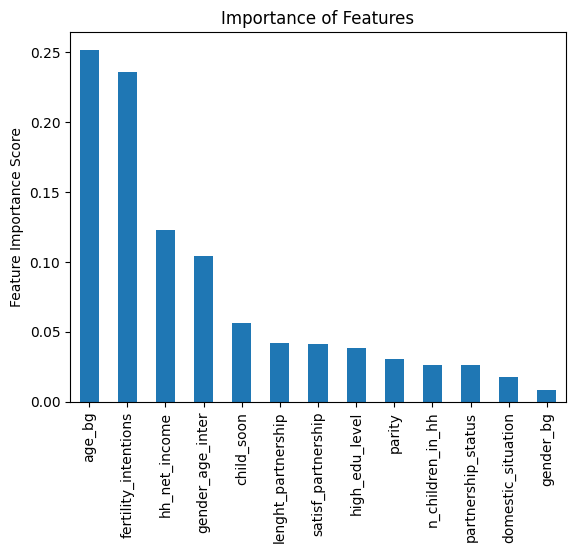

In [333]:
model1 = GradientBoostingClassifier(learning_rate=0.05, n_estimators=200,max_depth=4, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10)
model1.fit(X_train,y_train)
predictors=list(X_train)

feat_imp = pd.Series(model1.feature_importances_, predictors).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')
print('Accuracy of the GBM on test set: {:.3f}'.format(model1.score(X_test, y_test)))

In [345]:
probabilities = model1.predict_proba(X_train)[:, 1]

for threshold in np.arange(0.3, 0.55, 0.05): 
    
    predictions = (probabilities >= threshold).astype(int)
    
    print('Threshold {:.2f}, Overall F1 for test: {:.3f}'.format(threshold, f1_score(y_train, predictions, average='macro')))


Threshold 0.30, Overall F1 for test: 0.906
Threshold 0.35, Overall F1 for test: 0.913
Threshold 0.40, Overall F1 for test: 0.916
Threshold 0.45, Overall F1 for test: 0.911
Threshold 0.50, Overall F1 for test: 0.900
Threshold 0.55, Overall F1 for test: 0.890


In [ ]:
## for training data, maybe threshold of 0.4 leads to higher 0.1 but not been increased a lot, 0.5 is still ok?

In [346]:

pred=model1.predict(X_test)
print(classification_report(y_test, pred))

print('Overall F1 for test: {:.3f}'.format(f1_score(y_test, pred, average='macro')))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82        22
           1       0.33      0.33      0.33         6

    accuracy                           0.71        28
   macro avg       0.58      0.58      0.58        28
weighted avg       0.71      0.71      0.71        28

Overall F1 for test: 0.576


In [351]:
probabilities = model1.predict_proba(X_test)[:, 1]

for threshold in np.arange(0.2, 0.55, 0.05): 
    
    predictions = (probabilities >= threshold).astype(int)
    
    print('Threshold {:.2f}, Overall F1 for test: {:.3f}'.format(threshold, f1_score(y_test, predictions, average='macro')))


Threshold 0.20, Overall F1 for test: 0.524
Threshold 0.25, Overall F1 for test: 0.576
Threshold 0.30, Overall F1 for test: 0.576
Threshold 0.35, Overall F1 for test: 0.576
Threshold 0.40, Overall F1 for test: 0.576
Threshold 0.45, Overall F1 for test: 0.576
Threshold 0.50, Overall F1 for test: 0.576


In [302]:

filename = 'gbmodel.sav'
pickle.dump(model1, open(filename, 'wb'))